# Read all log.txt

In [1]:
import glob
import pandas as pd
from pandas.core.common import flatten
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "D:/Dev/ReinforcementLearning/results/CartPole-v1/"

In [3]:
logs = glob.glob(path + "/*/*/*.txt")

In [4]:
def read_file(path):
    values = []
    col = path.split("\\")[-2].split("_")
           
    with open(path, "r") as file:
        for i in file.readlines():
            values.append([path.split("\\")[-3],*col,*i.split("\n")[0].split(",")])
    return values

In [5]:
columns = ["algo","step_train","batch_size", "gamma", "greedy_exploration","network","", "optimizer", "lr", "memories", "max_size", "step", "max", "min", "avg", "sum"]

In [6]:
df = pd.DataFrame([], columns = columns)
for file in logs:
    ite = pd.DataFrame(read_file(file), columns = columns)
    df = pd.concat([df,ite],  ignore_index=True)

# Result

In [7]:
df.head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
0,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,1,1.0,1.0,1.0,10.0
1,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,100,1.0,1.0,1.0,8.0
2,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,200,1.0,1.0,1.0,10.0
3,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,300,1.0,1.0,1.0,9.0
4,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,1,1.0,1.0,1.0,13.0
5,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,100,1.0,1.0,1.0,8.0
6,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,200,1.0,1.0,1.0,10.0
7,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,300,1.0,1.0,1.0,10.0
8,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.001,ExperienceReplay,2048,1,1.0,1.0,1.0,9.0
9,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.001,ExperienceReplay,2048,100,1.0,1.0,1.0,8.0


## Sort by sum and step

In [8]:
for c in ["step_train", "batch_size", "gamma", "lr", "step", "max", "min", "avg", "sum"]:
    df[c] = df[c].astype(float)
for c in df.columns:
    if df[c].dtypes  == "object":
        df[c] = df[c].astype('category')

In [9]:
df.sort_values(by =["sum","step"],  ascending = [False, True]).head(50)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
1165,DoubleDQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3465,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3517,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3565,DQN,1.0,32.0,0.95,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3637,DQN,1.0,32.0,0.95,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3657,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3661,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3705,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3805,DQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3873,DQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0


## Correlation matrix

In [10]:
df_corr = df.copy()

In [11]:
for c in df_corr.columns:
    try:
        df_corr[c] = df_corr[c].cat.codes
    except:
        pass

In [12]:
df_corr.corr()["sum"]

algo                  0.076132
step_train           -0.296598
batch_size            0.010127
gamma                 0.003114
greedy_exploration    0.039972
network               0.092208
                           NaN
optimizer                  NaN
lr                   -0.162304
memories                   NaN
max_size             -0.019007
step                  0.193688
max                        NaN
min                        NaN
avg                        NaN
sum                   1.000000
Name: sum, dtype: float64

In [13]:
df_corr.corr()

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
algo,1.000000e+00,-5.623315e-18,-2.575691e-19,2.826676e-15,-2.764522e-19,6.428571e-01,NaN,NaN,-3.940167e-17,NaN,-5.151382e-20,7.394218e-21,NaN,NaN,NaN,0.076132
step_train,-5.623315e-18,1.000000e+00,0.000000e+00,-1.842055e-18,0.000000e+00,-3.243177e-16,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,-0.296598
batch_size,-2.575691e-19,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.789638e-16,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.010127
gamma,2.826676e-15,-1.842055e-18,0.000000e+00,1.000000e+00,1.596097e-18,-6.270822e-16,NaN,NaN,-7.129370e-17,NaN,0.000000e+00,-6.147437e-17,NaN,NaN,NaN,0.003114
greedy_exploration,-2.764522e-19,0.000000e+00,0.000000e+00,1.596097e-18,1.000000e+00,-1.247721e-16,NaN,NaN,-9.193077e-20,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.039972
network,6.428571e-01,-3.243177e-16,5.789638e-16,-6.270822e-16,-1.247721e-16,1.000000e+00,NaN,NaN,-2.678283e-17,NaN,-5.151382e-20,0.000000e+00,NaN,NaN,NaN,0.092208
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
optimizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr,-3.940167e-17,0.000000e+00,0.000000e+00,-7.129370e-17,-9.193077e-20,-2.678283e-17,NaN,NaN,1.000000e+00,NaN,0.000000e+00,-2.826701e-17,NaN,NaN,NaN,-0.162304
memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

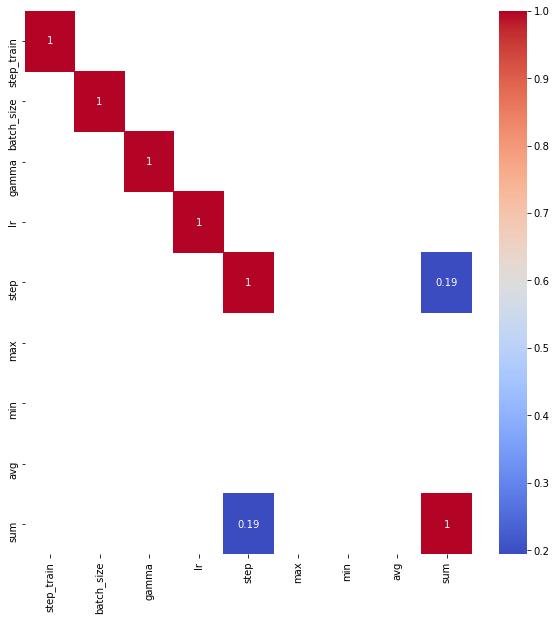

In [14]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df.corr()[df.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

## Correlation matrix for best result

In [15]:
df_corr_best = df_corr[df_corr["sum"] >= 300]

In [16]:
df_corr_best.corr()

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
algo,1.000000,NaN,0.112709,-0.037825,0.043999,-0.056225,NaN,NaN,-0.135368,NaN,-0.069833,0.183593,NaN,NaN,NaN,-0.095344
step_train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
batch_size,0.112709,NaN,1.000000,0.012550,0.172308,0.160863,NaN,NaN,0.069651,NaN,-0.011952,0.061268,NaN,NaN,NaN,0.106454
gamma,-0.037825,NaN,0.012550,1.000000,0.022875,-0.011406,NaN,NaN,0.164446,NaN,-0.005692,0.079102,NaN,NaN,NaN,-0.012959
greedy_exploration,0.043999,NaN,0.172308,0.022875,1.000000,-0.016148,NaN,NaN,0.086427,NaN,0.073303,0.023600,NaN,NaN,NaN,-0.129496
network,-0.056225,NaN,0.160863,-0.011406,-0.016148,1.000000,NaN,NaN,0.340150,NaN,0.001812,0.008857,NaN,NaN,NaN,0.017570
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
optimizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr,-0.135368,NaN,0.069651,0.164446,0.086427,0.340150,NaN,NaN,1.000000,NaN,0.053788,-0.096300,NaN,NaN,NaN,0.152201
memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

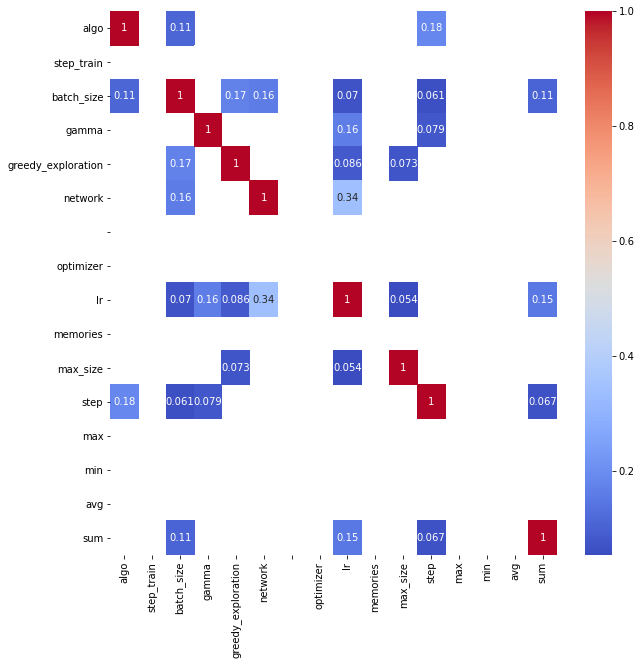

In [17]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_corr_best.corr()[df_corr_best.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

# Result by algo

### DQN

In [18]:
df_DQN = df[df["algo"] == "DQN"].copy()

In [19]:
df_DQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000e+00,0.000000,2.878211e-19,-2.652432e-19,0.000000e+00,NaN,NaN,NaN,-0.354447
batch_size,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.013168
gamma,2.878211e-19,0.000000,1.000000e+00,-7.434171e-19,5.379008e-17,NaN,NaN,NaN,0.006608
lr,-2.652432e-19,0.000000,-7.434171e-19,1.000000e+00,1.475314e-19,NaN,NaN,NaN,-0.172892
step,0.000000e+00,0.000000,5.379008e-17,1.475314e-19,1.000000e+00,NaN,NaN,NaN,0.212736
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,-3.544474e-01,0.013168,6.608468e-03,-1.728916e-01,2.127362e-01,NaN,NaN,NaN,1.000000


In [20]:
max(df_DQN["sum"]), min(df_DQN["sum"])

(500.0, 8.0)

In [21]:
df_DQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
3465,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3517,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3565,DQN,1.0,32.0,0.95,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3637,DQN,1.0,32.0,0.95,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3657,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3661,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3705,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3805,DQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3873,DQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
4025,DQN,1.0,32.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.1000,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0


<AxesSubplot:>

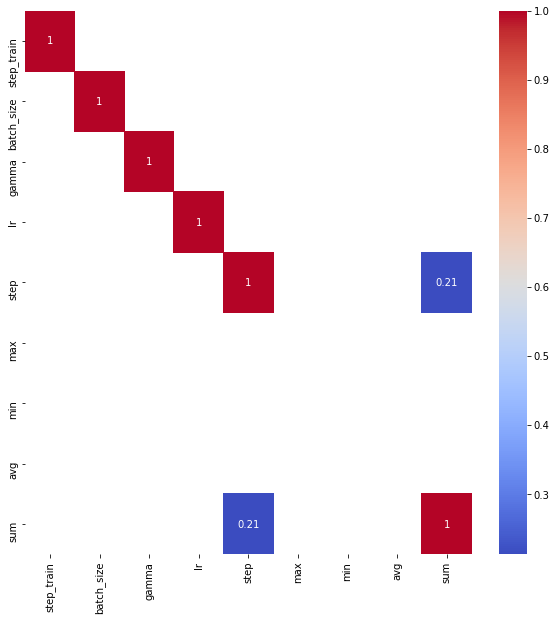

In [22]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[df_DQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

### DoubleDQN

In [23]:
df_DoubleDQN = df[df["algo"] == "DoubleDQN"].copy()

In [24]:
df_DoubleDQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000e+00,0.000000,2.878211e-19,-2.652432e-19,0.000000e+00,NaN,NaN,NaN,-0.331559
batch_size,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.011269
gamma,2.878211e-19,0.000000,1.000000e+00,-7.434171e-19,5.379008e-17,NaN,NaN,NaN,0.000469
lr,-2.652432e-19,0.000000,-7.434171e-19,1.000000e+00,1.475314e-19,NaN,NaN,NaN,-0.209891
step,0.000000e+00,0.000000,5.379008e-17,1.475314e-19,1.000000e+00,NaN,NaN,NaN,0.247644
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,-3.315588e-01,0.011269,4.687802e-04,-2.098907e-01,2.476441e-01,NaN,NaN,NaN,1.000000


In [25]:
max(df_DoubleDQN["sum"]), min(df_DoubleDQN["sum"])

(500.0, 8.0)

In [26]:
df_DoubleDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
1165,DoubleDQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
1954,DoubleDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
2066,DoubleDQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
2174,DoubleDQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,200.0,1.0,1.0,1.0,500.0
2258,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
2270,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,200.0,1.0,1.0,1.0,500.0
2290,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
1395,DoubleDQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0
1587,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0
1595,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0


<AxesSubplot:>

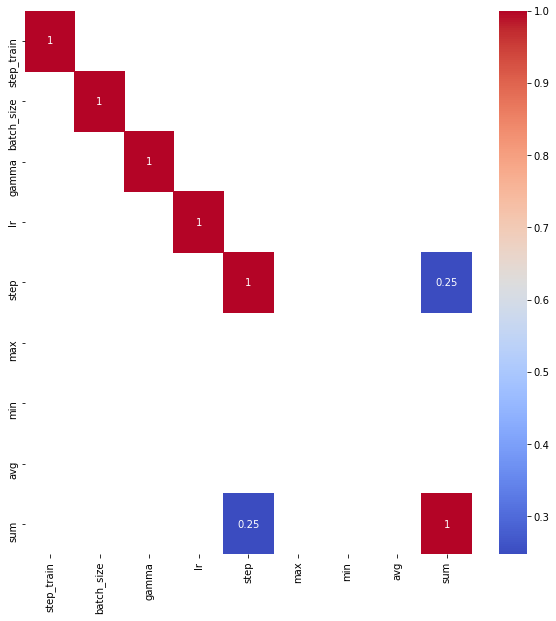

In [27]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DoubleDQN.corr()[df_DoubleDQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

### CategoricalDQN

In [28]:
df_CategoricalDQN = df[df["algo"] == "CategoricalDQN"].copy()

In [29]:
df_CategoricalDQN.corr()

,step_train,batch_size,gamma,lr,step,max,min,avg,sum
step_train,1.000000e+00,0.000000e+00,4.605138e-18,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.064880
batch_size,0.000000e+00,1.000000e+00,-8.922455e-18,-5.139086e-19,0.000000e+00,NaN,NaN,NaN,-0.043305
gamma,4.605138e-18,-8.922455e-18,1.000000e+00,-1.040784e-17,2.305289e-17,NaN,NaN,NaN,-0.035606
lr,0.000000e+00,-5.139086e-19,-1.040784e-17,1.000000e+00,0.000000e+00,NaN,NaN,NaN,-0.047623
step,0.000000e+00,0.000000e+00,2.305289e-17,0.000000e+00,1.000000e+00,NaN,NaN,NaN,-0.123315
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sum,6.487997e-02,-4.330543e-02,-3.560609e-02,-4.762285e-02,-1.233147e-01,NaN,NaN,NaN,1.000000


In [30]:
max(df_CategoricalDQN["sum"]), min(df_CategoricalDQN["sum"])

(165.0, 8.0)

In [31]:
df_CategoricalDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
636,CategoricalDQN,32.0,32.0,0.95,EpsilonGreedy-0.1,C51Network,,Adam,0.0010,ExperienceReplay,512,1.0,1.0,1.0,1.0,165.0
36,CategoricalDQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0010,ExperienceReplay,512,1.0,1.0,1.0,1.0,64.0
804,CategoricalDQN,32.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0010,ExperienceReplay,512,1.0,1.0,1.0,1.0,58.0
824,CategoricalDQN,32.0,32.0,1.00,EpsilonGreedy-0.1,C51Network,,Adam,0.0010,ExperienceReplay,2048,1.0,1.0,1.0,1.0,46.0
677,CategoricalDQN,32.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,100.0,1.0,1.0,1.0,39.0
968,CategoricalDQN,32.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0010,ExperienceReplay,2048,1.0,1.0,1.0,1.0,32.0
780,CategoricalDQN,32.0,32.0,1.00,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0010,ExperienceReplay,512,1.0,1.0,1.0,1.0,28.0
504,CategoricalDQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,1.0,1.0,1.0,1.0,27.0
904,CategoricalDQN,32.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.1000,ExperienceReplay,2048,1.0,1.0,1.0,1.0,27.0
1004,CategoricalDQN,32.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.1000,ExperienceReplay,512,1.0,1.0,1.0,1.0,24.0


<AxesSubplot:>

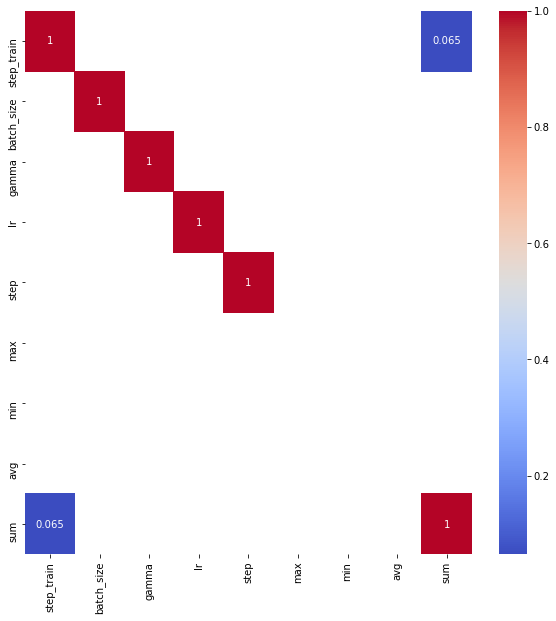

In [32]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_CategoricalDQN.corr()[df_CategoricalDQN.corr() > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)